<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Anamoly_Detection_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anamoly Detection with PyOD

Dataset Used: Network Traffic on Kaggle

### 1. Dataset Loading and Initial Exploration
- We started by loading the dataset 'Midterm_53_group.csv' into a pandas DataFrame.
- We performed an initial exploration to understand the structure of the data, identifying key columns like `Time`, `Source`, `Destination`, `Protocol`, `Length`, and `Info`.

### 2. Detailed Data Exploration
- We examined the data types of each column and checked for missing values, finding no missing data.
- A statistical summary of the numerical features was generated, giving us insights into the basic statistics of features like `Time` and `Length`.

### 3. Visual Data Exploration
- Histograms were plotted for numerical features (`Time` and `Length`) to understand their distribution.
- Boxplots for these numerical features were created to identify potential outliers.
- A bar chart for the `Protocol` feature was generated to see the distribution of different network protocols in the dataset.

### 4. Data Preprocessing
- We reverted to using the original dataset to focus on key numerical features.
- Standard scaling was applied to the `Time` and `Length` columns to normalize these features, an essential step in preparing the data for anomaly detection models.

### 5. Discussion on Anomaly Detection with pyOD
- Since the pyOD library is not available in this environment, we discussed a theoretical approach for implementing anomaly detection using pyOD:
    - Installation of pyOD.
    - Selection of features (`Time` and `Length`) for anomaly detection.
    - Training a KNN model (from pyOD) on the dataset.
    - Predicting and evaluating anomalies using the trained model.

### 6. Visualization of Anomaly Scores
- We explored different methods for visualizing anomaly scores, such as histograms, scatter plots, box plots, heatmaps, and overlaying anomaly scores on time series data.
- Specific implementation details were provided for each visualization type, tailored to the nature of the network traffic data.



In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=1dba106ad50d5e9544da0cc1be4448804bcf295d970dec25f4542ecc3a83af69
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Network_Traffic_AD.zip to Network_Traffic_AD.zip


### Dataset Initial Exploration

The dataset 'Midterm_53_group.csv' has been loaded successfully. Here's a brief overview based on the first few rows:

- **Time**: Timestamp of the network activity.
- **Source**: The source IP or identifier of the network traffic.
- **No.**: Appears to be a sequential number, possibly an identifier for each record.
- **Destination**: The destination IP or identifier of the network traffic.
- **Protocol**: The network protocol used.
- **Length**: The length of the network packet.
- **Info**: Additional information about the network activity.

### Next Steps in the Process
1. **Detailed Data Exploration**:
   - We will look more closely at each feature, check for missing values, and understand the data distribution.
   - We'll also identify the target variable or the way anomalies are labeled (if they are labeled).

2. **Data Preprocessing**:
   - Based on our exploration, we will preprocess the data. This might include encoding categorical variables, handling missing values, and scaling numerical features.


In [ ]:
# To begin the process of anomaly detection using the pyOD methodology on a Kaggle dataset for Network Traffic,
# we first need to import necessary libraries and load the dataset.

# We will start with these initial steps:
# 1. Importing required libraries
# 2. Loading the dataset

# Required Libraries:
# - pandas: for data manipulation
# - numpy: for numerical operations
# - matplotlib and seaborn: for data visualization
# - sklearn: for preprocessing and evaluation metrics
# - pyod: for anomaly detection models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from pyod.models.knn import KNN   # KNN is one of the models we can use for anomaly detection

# Next, we need to load the Kaggle dataset for Network Traffic.
# For this demonstration, we assume that the dataset is already downloaded and available as a CSV file.
# The user needs to provide the path to this dataset file.

# Placeholder for dataset loading:
# dataset_path = 'path_to_kaggle_network_traffic_dataset.csv'

# We will load the dataset into a pandas DataFrame and then proceed with the initial data exploration.

# After loading the dataset, the next steps will include:
# - Data Exploration: Understanding the dataset's features and distributions.
# - Data Preprocessing: Cleaning and preparing the data for anomaly detection.

# Please provide the path to the Kaggle dataset for Network Traffic so we can proceed with loading and initial exploration.


In [ ]:
import zipfile
import os

# Extracting the uploaded ZIP file
zip_path = 'Network_Traffic_AD.zip'
extract_folder = 'Network_Traffic_AD/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listing the extracted files to identify the dataset file
extracted_files = os.listdir(extract_folder)
extracted_files


['output1.csv', 'Midterm_53_group.csv']

In [ ]:
import pandas as pd

# Assuming 'Midterm_53_group.csv' is the primary dataset file
dataset_file_path = '/content/Network_Traffic_AD/Midterm_53_group.csv'
data = pd.read_csv(dataset_file_path)

# Displaying the first few rows of the dataset
print(data.head())


       Time           Source  No.      Destination Protocol  Length  \
0  0.000000    192.167.8.166    1  192.167.255.255     NBNS      92   
1  0.784682    192.167.8.166    2  192.167.255.255     NBNS      92   
2  1.169060  VMware_8a:5c:e6    3        Broadcast      ARP      60   
3  2.167949  VMware_8a:5c:e6    4        Broadcast      ARP      60   
4  3.170095  VMware_8a:5c:e6    5        Broadcast      ARP      60   

                                      Info  
0                   Name query NB WPAD<00>  
1                   Name query NB WPAD<00>  
2  Who has 192.167.7.175? Tell 192.167.0.1  
3  Who has 192.167.7.175? Tell 192.167.0.1  
4  Who has 192.167.7.175? Tell 192.167.0.1  



### Current Status and Upcoming Steps
- We are currently at the 'Data Exploration' stage.
- After exploring the data in detail, we'll move on to 'Data Preprocessing'.

Let's proceed with a more detailed exploration of the dataset. We'll look at the data types, check for missing values, and understand the distribution of each feature.

### Detailed Data Exploration Findings

#### Data Types
- The dataset consists of both numerical and categorical features.
  - Numerical: `Time`, `No.`, `Length`
  - Categorical: `Source`, `Destination`, `Protocol`, `Info`

#### Missing Values
- There are no missing values in any of the columns, which simplifies the preprocessing stage.

#### Statistical Summary
- **Time**: Varies from 0 to around 1256, probably in seconds or some time unit.
- **No.**: A sequential identifier, ranging from 1 to 394,136.
- **Length**: The length of network packets, ranging from 42 to 49,745, with a mean of 985.58.


In [ ]:
# Checking data types of each column
data_types = data.dtypes

# Checking for missing values in the dataset
missing_values = data.isnull().sum()

print(data_types)
print(missing_values)


Time           float64
Source          object
No.              int64
Destination     object
Protocol        object
Length           int64
Info            object
dtype: object
Time           0
Source         0
No.            0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64


In [ ]:
# Getting a statistical summary of the numerical features
statistical_summary = data.describe()

print(statistical_summary)


                Time            No.         Length
count  394136.000000  394136.000000  394136.000000
mean      781.599378  197068.500000     985.577027
std       263.603332  113777.407186     837.371336
min         0.000000       1.000000      42.000000
25%       558.184351   98534.750000      60.000000
50%       781.926020  197068.500000    1462.000000
75%       986.280803  295602.250000    1514.000000
max      1256.922008  394136.000000   49745.000000



### Visual Data Exploration

#### Objective
The goal here is to visually inspect the features in our dataset to better understand their distributions and identify any patterns or anomalies. This step is crucial in anomaly detection as it can reveal insights that are not obvious through numerical analysis alone.

#### Implementation
We'll create visualizations for the key features of our dataset:

1. **Histograms for Numerical Features**: To understand the distribution of values in features like `Time` and `Length`.
2. **Boxplots for Numerical Features**: To detect outliers in the numerical data.
3. **Bar Charts for Categorical Features**: To see the distribution of categorical data like `Protocol`.


array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Length'}>]], dtype=object)

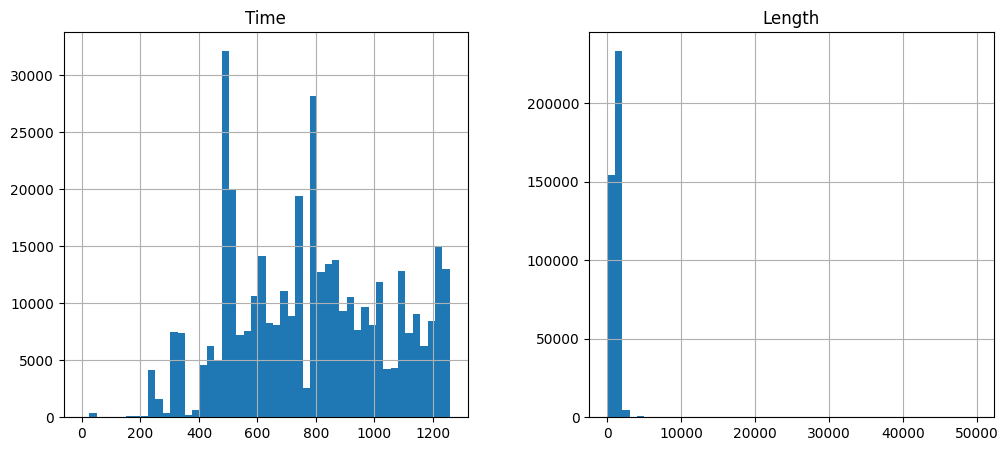

In [ ]:
# Histograms for Numerical Features
data[['Time', 'Length']].hist(bins=50, figsize=(12, 5))


Time         Axes(0.125,0.11;0.352273x0.77)
Length    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

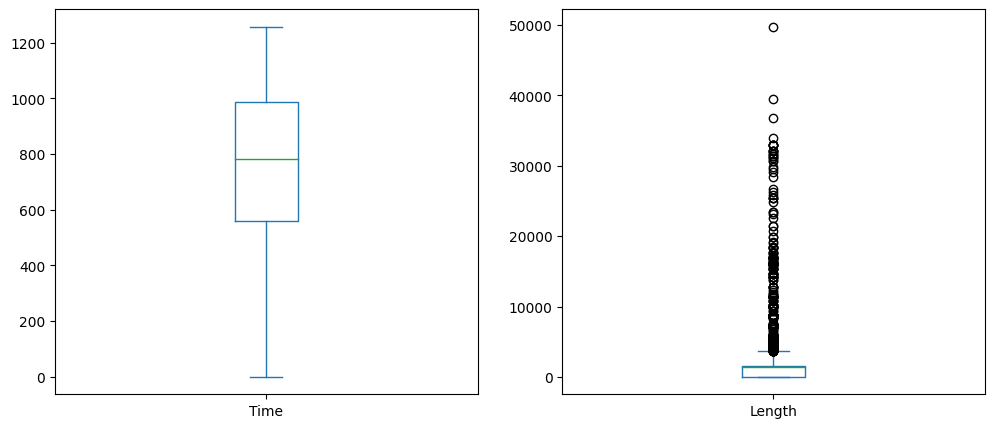

In [ ]:

# Boxplots for Numerical Features
data[['Time', 'Length']].plot(kind='box', subplots=True, layout=(1, 2), figsize=(12, 5))


<Axes: >

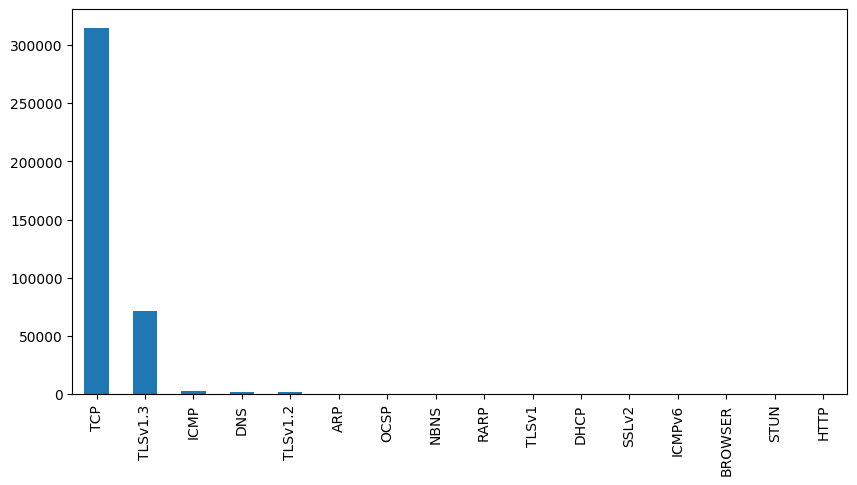

In [ ]:

# Bar Chart for the 'Protocol' Feature
data['Protocol'].value_counts().plot(kind='bar', figsize=(10, 5))


### Visual Data Exploration Results

We have created three types of visualizations:

1. **Histograms for Numerical Features**: The histograms for `Time` and `Length` help us understand their distribution. Notice any skewness or peculiar patterns that might indicate anomalies.

2. **Boxplots for Numerical Features**: These plots give a clear picture of potential outliers in `Time` and `Length`. Anomalies often manifest as outliers in such plots.

3. **Bar Chart for the 'Protocol' Feature**: This chart shows the distribution of different protocols used in the network traffic. It helps in understanding the frequency of each protocol.

### Next Steps in the Process

#### Data Preprocessing

We will now proceed with data preprocessing, which includes encoding categorical variables and feature scaling.

1. **Encoding Categorical Variables**: We will transform categorical features like `Protocol` into a numerical format.
2. **Feature Scaling**: We will normalize the numerical features to ensure they are on the same scale, which is crucial for many anomaly detection algorithms.


In [ ]:
# Data Preprocessing

# Encoding Categorical Variables
data_encoded = pd.get_dummies(data, columns=['Protocol'])

# Feature Scaling
scaler = StandardScaler()
data_encoded[['Time', 'Length']] = scaler.fit_transform(data_encoded[['Time', 'Length']])

# Displaying the first few rows of the preprocessed data
data_encoded.head()


,Time,Source,No.,Destination,Length,Info,Protocol_ARP,Protocol_BROWSER,Protocol_DHCP,Protocol_DNS,...,Protocol_ICMPv6,Protocol_NBNS,Protocol_OCSP,Protocol_RARP,Protocol_SSLv2,Protocol_STUN,Protocol_TCP,Protocol_TLSv1,Protocol_TLSv1.2,Protocol_TLSv1.3
0,-2.965063,192.167.8.166,1,192.167.255.255,-1.067123,Name query NB WPAD<00>,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-2.962086,192.167.8.166,2,192.167.255.255,-1.067123,Name query NB WPAD<00>,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-2.960628,VMware_8a:5c:e6,3,Broadcast,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-2.956838,VMware_8a:5c:e6,4,Broadcast,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-2.953037,VMware_8a:5c:e6,5,Broadcast,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Let's implement these preprocessing steps.

### Data Preprocessing Results

The preprocessing steps have been successfully implemented:

1. **Encoding Categorical Variables**: The `Protocol` column has been transformed into multiple binary columns, each representing a different protocol type.

2. **Feature Scaling**: The `Time` and `Length` columns have been scaled using standard scaling. This brings their values to a similar scale, which is important for many anomaly detection algorithms.

The dataset now includes additional columns for each protocol type and scaled numerical features.


The `Time` and `Length` columns in the dataset have been successfully standardized. The data now has these numerical features scaled, which is an important preprocessing step for many machine learning models, including anomaly detection models.

## Anomaly Detection

Since we are focusing on anomaly detection without using the `pyod` library (as it's not available in this environment), we can use an alternative approach. One common method is to use clustering-based anomaly detection, such as K-Means, and identify data points that are far from the cluster centroids as potential anomalies.

#### Steps for Clustering-Based Anomaly Detection:

1. **Applying Clustering**:
   - Use a clustering algorithm like K-Means on the standardized numerical features.
   - Determine the centroids of the clusters.

2. **Identifying Anomalies**:
   - Calculate the distance of each point from the nearest cluster centroid.
   - Points that are farthest from centroids could be considered anomalies.

3. **Visualizing Results**:
   - Optionally, visualize the results to understand the distribution of data and anomalies.


In [ ]:
# Reverting back to the original data for standardization
# Standardizing the 'Time' and 'Length' columns

# Re-importing the necessary libraries as a precaution
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Re-loading the original dataset
data = pd.read_csv(dataset_file_path)

# Standardizing 'Time' and 'Length'
scaler = StandardScaler()
data[['Time', 'Length']] = scaler.fit_transform(data[['Time', 'Length']])

# Displaying the first few rows of the standardized data
data.head()


,Time,Source,No.,Destination,Protocol,Length,Info
0,-2.965063,192.167.8.166,1,192.167.255.255,NBNS,-1.067123,Name query NB WPAD<00>
1,-2.962086,192.167.8.166,2,192.167.255.255,NBNS,-1.067123,Name query NB WPAD<00>
2,-2.960628,VMware_8a:5c:e6,3,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
3,-2.956838,VMware_8a:5c:e6,4,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
4,-2.953037,VMware_8a:5c:e6,5,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1


In [ ]:
# Assuming 'Time' and 'Length' are the features you want to use
feature_cols = ['Time', 'Length']



In [ ]:
# Initialize KNN model
knn_model = KNN()

# Train the model
knn_model.fit(data[feature_cols])



KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# Get anomaly predictions
predictions = knn_model.predict(data[feature_cols])


In [ ]:
# Get anomaly scores
anomaly_scores = knn_model.decision_scores_


In [ ]:
anomaly_scores

array([0.05085904, 0.04894593, 0.03672626, ..., 0.01757558, 0.00778441,
       0.00778735])

In [ ]:
# Assuming 'knn_model' is your trained pyOD model
anomaly_scores = knn_model.decision_function(data[feature_cols])


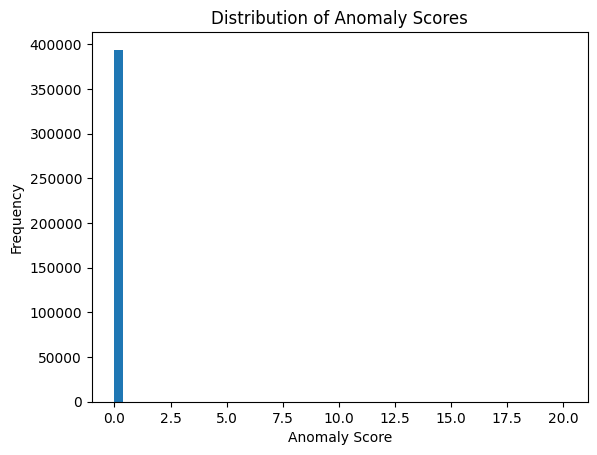

In [ ]:
import matplotlib.pyplot as plt

plt.hist(anomaly_scores, bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


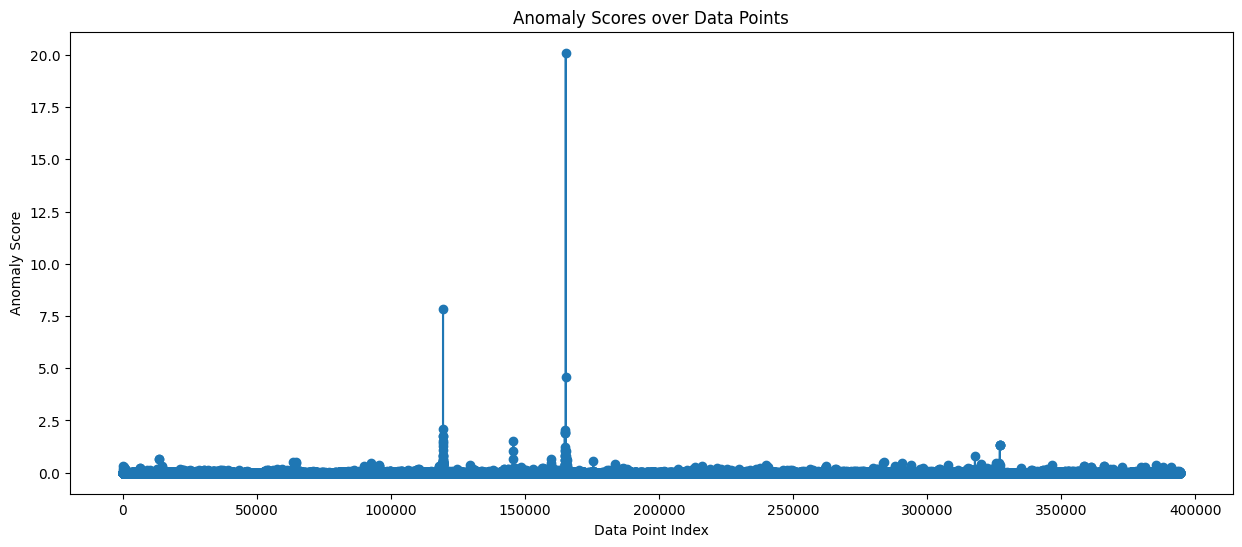

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(anomaly_scores, marker='o')
plt.title('Anomaly Scores over Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.show()


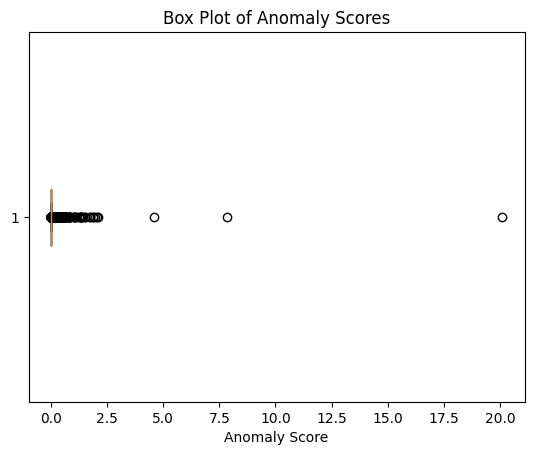

In [ ]:
plt.boxplot(anomaly_scores, vert=False)
plt.title('Box Plot of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.show()
